<div style="display: flex; align-items: center; justify-content: center; margin-bottom: 20px;">
    <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/7/73/Univ_Aix-Marseille_-_Sciences.svg/langfr-1920px-Univ_Aix-Marseille_-_Sciences.svg.png" width=150 height=150 style="margin: 0 10px;">
    <img src="https://www.sophia-antipolis.fr/wp-content/uploads/2020/04/L-Institut-Sophia-Agrobiotech-ISA_inra_image.jpg" width=150 height=150 style="margin: 0 10px;">
    <img src="https://www.sophia-antipolis.fr/wp-content/uploads/2020/04/INRAE-Logo.jpg" width=150 height=150 style="margin: 0 10px;">
    <img src="https://preferences.univ-cotedazur.fr/build/images/uca-logo.jpg" width=150 height=150 style="margin: 0 10px;">
    <img src="https://www.sophia-antipolis.fr/wp-content/uploads/2019/08/CNRS.jpg" width=150 height=150 style="margin: 0 10px;">
    <img src="https://www.sophia-antipolis.fr/wp-content/uploads/2020/10/npx-lab-pic-80.png" width=150 height=150 style="margin: 0 10px;">
</div>

<div style="text-align: center;">
    <h1>MODELISER LA DYNAMIQUE DES POPULATIONS DE DROSOPHILA SUZUKII AFIN D’OPTIMISER LE DEPLOIEMENT DE LA TECHNIQUE DE L’INSECTE STERILE</h1>
    <hr style="margin: 20px;">
    <h2>ANALYSE NUMERIQUE ET SIMULATION – MODELE D SUZUKII</h2>
    <hr style="margin: 20px;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/DrosophilasuzukiiphotoMcEvey.jpg/1280px-DrosophilasuzukiiphotoMcEvey.jpg" width=300 height=300 alt="Drosophila Suzukii">
</div>

<div style="display: flex; justify-content: space-between; margin-top: 20px;">
    <div style="text-align: left;">
        <h3>Etudiant:</h3>
        <h3>Crésus KOUNOUDJI</h3>
    </div>
    <div style="text-align: right;">
        <h3>Tuteurs:</h3>
        <h3>Frédéric Grognard</h3>
        <h3>Ludovic Mailleret</h3>
        <h3>Louise van Oudenhove</h3>
        <h3>Suzanne Touzeau</h3>
    </div>
</div>

<div style="text-align: center; margin-top: 20px;">
    <h3><b>INSTITUT SOPHIA AGROBIOTECH - M2P2</b></h3>
    <h3><b>Juin 2022</b></h3>
</div>


## I - MODEL SIMPLIFIÉ DROZOPHILA SUZUKII

- Packages Utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
import sympy as sm
from IPython.display import display, Math
import os
import math

- Le système dynamique est:
\begin{equation} \label{eq:modele-TIS}
\left\{
\begin{array}{rl}
  \dot{L} &= \beta(1-\frac{L}{K})F-(\mu_L+v_L)L & \text{ (L : les Larves)} \\
  \dot{M} &= v_LmL-\mu_MM & \text{ (M : les Mâles)}\\
  \dot{V} &= v_L(1-m) L-(\mu_F+v_F)V & \text{ (V : les femelles Vierges)}\\
  \dot{F} &= v_F\frac{M}{M+M_S}V-\mu_FF & \text{ (F : les femelles Fertilisées et $M_S$ : les Mâles Stériles)}
\end{array}
\right.
\end{equation}

On en a déduit:

\begin{equation}
\left\{
\begin{array}{rlrl}
\eta_0&=\frac{\beta v_Fv_L(1-m)}{\mu_F(\mu_F+v_F)(\mu_L+v_L)} & \text{le nombre de descendants de base} \\
y &= M_S = -\frac{\eta_0}{K}\gamma L^{*2}+\gamma(\eta_0-1)L^* & \text{l'équation de la parabole $y = M_S$} \\
\text{avec } \gamma &= \frac{v_L m}{\\mu_M} \text{ et } L^* \in \mathopen{[}0,K(1-\frac{1}{\eta_0})\mathclose{]}
\end{array}
\right.
\end{equation}

Avec :
\begin{equation}
\left\{
\begin{array}{rlrl}
\beta & \text{taux de ponte} & 6  \text{ (œufs/F/j)}\\
K & \text{capacité de charge} & 1000 \text{ (larve)}\\
\mu_L & \text{taux de mortalité des larves} & \frac{-\log(0.64)}{12.8}  \text{(/jour)}\\
\mu_F & \text{taux de mortalité des femelles} & \frac{1}{79.5} \text{ (/jour)}\\
\mu_M & \text{taux de mortalité des mâles} & \frac{1}{93.6} \text{ (/jour)}\\
v_L & \text{taux de maturation des larves} & \frac{1}{12.8} \text{ (/jour)}\\
v_F & \text{taux d'accouplement} & \frac{1}{1.5} \text{ (/jour)}\\
m & \text{sex-ratio, \emph{proportion de mâles}} & 0.5\\
\end{array}
\right.
\end{equation}

- Paramètres

In [2]:
#Paramètres déduit de la littérature (cf. rapport)
K = 1000 #capacité de charge
b = 6 #taux de ponte intrinsèque/femelle/jour
m = 0.5 #sex ratio
vL = 1/12.8 #taux de transfert de larves à adultes
vF = 1/1.5 #taux de transfert de vierges à fecondée
uL = -np.log(0.64)/12.8 #taux de mortalité des larves
uM = 1/93.6 #taux de mortalité des mâles
uF =1/79.5 #taux de mortalité des femmelles
###### 
#calcul à partir des paramètres
etha0 = vF*vL*(1-m)*b/(uF*(uF+vF)*(uL+vL))#nombre de descendants de base
gamma = vL*m/uM#le paramètre Gamma de l'equation de la parabole MS
######
#paramètre de temps pour l'intégration du système
t_0 = 0             # temps initial
t_fin = 700       # temps final
pas_t = 0.001        # pas de temps 
t = np.arange(t_0, t_fin, pas_t)#période de temps

Chemin pour exporter les resultats

In [3]:
output_fold = os.getcwd() + r'\output'

### 1.1 - Le système dynamique

In [4]:
#definir le systeme d'equations differentiels
def model_ds(X,t,Ms=0):
    L = X[0] #larves
    V = X[1] #femelles vierges
    M = X[2] #mâles
    F = X[3] #femelles fertilisées
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    V_dot = (1-m)*vL*L - (uF+vF)*V
    if Ms==0:
        F_dot = vF*V - uF*F
    if Ms!=0:
        F_dot = vF*V*M/(M+Ms) - uF*F
    #vecteurs
    return np.array([L_dot,V_dot,M_dot,F_dot])

### 1.2 - Analyse numérique de la stabilité des modèles

In [5]:
def analyse_stabilite(Ms=0):    
    Eq = []
    #définir les variables comme non-négatives
    L,V,M,F  = sm.symbols('L,V,M,F', negative=False, real = True)
    #système d'équation différentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    V_dot = (1-m)*vL*L - (uF+vF)*V
    if Ms==0:
        F_dot = vF*V - uF*F
    if Ms!=0:
        F_dot = vF*V*M/(M+Ms) - uF*F
    #utiliser la méthode de sympy pour mettre les équations à zéro
    Ld_qual = sm.Eq(L_dot, 0)
    Vd_qual = sm.Eq(V_dot, 0)
    Fd_qual = sm.Eq(F_dot, 0)
    Md_qual = sm.Eq(M_dot, 0)
    #équilibres
    equilibre = sm.solve((Ld_qual, Vd_qual, Fd_qual,Md_qual), L,V,M,F )
    #se débarrasser de ceux dont l'une des espèces est zéro
    equili = []
    for ii in equilibre:
        if not any([i == 0.0 for i in ii]):
            equili.append(ii)
    #dans certains cas, sm.solve produit un formate qui doit être converti en l'image d'un nombre complexe, 
    #composé uniquement de la partie réelle et de la partie complexe 
    RE = []
    for item in equili:
        reqi = [f.as_real_imag() for f in item]
        re = []
        for it in reqi:
            #ici nous enlevons la partie réelle
            re.append(it[0])
        RE.append(re)        
    Eq.append(RE)

    #mettre les équations sous forme de matrice et calculer la matrice jacobienne  
    eqMat = sm.Matrix([L_dot,V_dot,M_dot,F_dot])
    Mat = sm.Matrix([L,V,M,F])
    jacMat = eqMat.jacobian(Mat)
    print('Matrice jacobienne \n %s' % np.matrix(jacMat))
    #nécessaire pour le calcul des valeurs propres
    import numpy.linalg as linalg
    for item in equilibre:
        # substituer les valeurs d'équilibre dans la matrice jacobienne et obtenir les valeurs propres
        # doit être converti en flottant, avec .astype(np.float64)
        eqmat = np.array(jacMat.subs([ (L, item[0]), (V, item[1]),
                (M, item[2]), (F, item[3])])).astype(np.float64)
        #valeurs propres comme première partie de linalg.eig()
        eigenValues,eigenVectors = linalg.eig(eqmat)
        print('-------------------------------------------')
        #Ne pas prendre les parties réelles
        print("Les parties réelles des valeurs propres pour le point fixe (%s, %s, %s,%s) sont %s :" 
              %(item[0], item[1], item[2],item[3], eigenValues.real))
        #vérifier le signe des parties réelles
        if all([d < 0 for d in eigenValues.real]): 
            print("Ce point fixe est un puits, l'équilibre est stable.")
        else:
            print("Le point fixe est une source, l'équilibre est instable.")
        #trouver la valeur propre dominante (la plus grande valeur absolue)
        domEV = max([abs(x) for x in eigenValues.real])
        posdomEV = [abs(x) for x in eigenValues.real].index(domEV)
        print("La valeur propre dominante est la valeur %s :" %(posdomEV + 1))

#### 1.2.1 Stabilités des équilibres: Modèle de base

In [6]:
analyse_stabilite(Ms=0)

Matrice jacobienne 
 [[-3*F/500 - 0.112991179892845 0 0 6 - 3*L/500]
 [0.0390625000000000 -0.679245283018868 0 0]
 [0.0390625000000000 0 -0.0106837606837607 0]
 [0 0.666666666666667 0 -0.0125786163522013]]
-------------------------------------------
Les parties réelles des valeurs propres pour le point fixe (0.0, 0.0, 0.0,0.0) sont [-0.01068376 -0.56903187 -0.56903187  0.33324866] :
Le point fixe est une source, l'équilibre est instable.
La valeur propre dominante est la valeur 2 :
-------------------------------------------
Les parties réelles des valeurs propres pour le point fixe (993.821486211627, 57.1533623797919, 3633.65980896126,3029.12820612897) sont [-1.06837607e-02 -6.79327511e-01 -1.24993881e-02 -1.82877574e+01] :
Ce point fixe est un puits, l'équilibre est stable.
La valeur propre dominante est la valeur 4 :


#### 1.2.2 Stabilités des équilibres: Modèle TIS

In [7]:
analyse_stabilite(Ms=1000)

Matrice jacobienne 
 [[-3*F/500 - 0.112991179892845 0 0 6 - 3*L/500]
 [0.0390625000000000 -0.679245283018868 0 0]
 [0.0390625000000000 0 -0.0106837606837607 0]
 [0 0.666666666666667*M/(M + 1000)
  -0.666666666666667*M*V/(M + 1000)**2 + 0.666666666666667*V/(M + 1000)
  -0.0125786163522013]]
-------------------------------------------
Les parties réelles des valeurs propres pour le point fixe (0.0, 0.0, 0.0,0.0) sont [-0.01068376 -0.67924528 -0.11299118 -0.01257862] :
Ce point fixe est un puits, l'équilibre est stable.
La valeur propre dominante est la valeur 2 :
-------------------------------------------
Les parties réelles des valeurs propres pour le point fixe (1.70327477668323, 0.0979530850306108, 6.22759840224804,0.0321305649640571) sont [-0.67666556 -0.12730208  0.00651346 -0.01823745] :
Le point fixe est une source, l'équilibre est instable.
La valeur propre dominante est la valeur 1 :
-------------------------------------------
Les parties réelles des valeurs propres pour le poi

### 1.3 Diagrammes de bifurcation

#### 1.3.1 diagrammes de bifurcation: Modèle de base

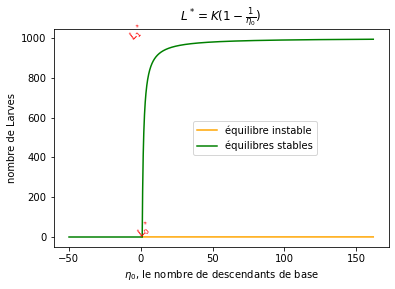

In [8]:
#Intialisation des paramètres: bifurcation de base
L0=0
pas_N = .1
#Les différents équilibres
#cas1 : équilibre triviale stable N0<=1
n1 = np.array(np.arange(-50,1.1,pas_N))#discretisation nombre de descendant cas1
L1 = [0]*len(n1)#nombre de larve cas1
plt.plot(n1,L1,color='g')#tracé correspondant au cas1
#cas2 : équilibre triviale instable N0>1
n2 = np.array(np.arange(1,etha0,pas_N))#discretisation nombre de descendant cas2
L2 = [0]*len(n2)#nombre de larve cas2
plt.plot(n2,L2,color='orange',label="équilibre instable")#tracé correspondant au cas2
#cas3 : équilibre endémique stable N0>1
n3 = np.array(np.arange(1,etha0,pas_N))#discretisation nombre de descendant cas3
L3 = [(1-(1/n))*K for n in n3]#nombre de larve cas3
plt.plot(n3,L3,color='g',label="équilibres stables")
#annotation sur le graphique
plt.annotate(r'$ {L_1}^*$', (-10,np.median(L3)),rotation=45,color='red')#equilibre positif L1
plt.annotate(r'$ {L_0}^*$', (-5,0),rotation=45,color='red')#equilibre Nulle L0
#titres sur le graphique
plt.xlabel(r'$\eta_0$, le nombre de descendants de base')#abscisse
plt.ylabel('nombre de Larves')#ordonnée 
plt.title(r'$L^* = K(1- \frac{1}{\eta_0})$')#titre du graphique
plt.legend(bbox_to_anchor=(.6,.5),loc='center')#legende du graphique
#exportation du graphique
plt.savefig(output_fold + r'\bifurc_tran.png', dpi=300)#format PNG
#plt.savefig(output_fold + r'\bifurc_tran.pdf', dpi=300) #format PDF
#plt.gca().invert_yaxis()
plt.show()

#### 1.3.2 diagrammes de bifurcation: Modèle avec la TIS

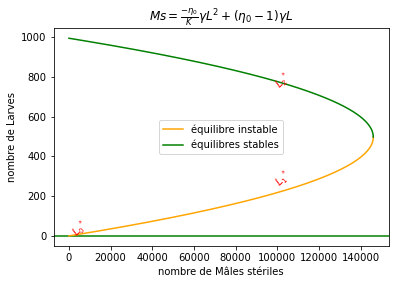

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
L_median = (K/2)*(1-(1/etha0))#Nombre de Larves au sommet de la parabole
L_max = K*(1-(1/etha0))#Nombre maximum de lavre sur la parabole MS
L0=0 #Nombre minimal de lavre sur la parabole MS
#Les différents équilibres
#cas1 : équilibre nul (0,0,0,0) toujours stable
plt.axhline(0,label=r'',color="g")
#cas2 : équilibre positif instable
Ln1 = np.array(np.arange(L0,L_median,0.1))#discretisation du nb de larves
Ms1 = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln1]#calcul des valeurs de MS
plt.plot(Ms1,Ln1,color='orange',label=r'équilibre instable')#tracé de la branche de la parabole
#cas3 : équilibre positif stable
Ln2 = np.array(np.arange(L_median,L_max,0.1))##discretisation du nb de larves
Ms2 = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln2]#calcul des valeurs de MS
plt.plot(Ms2,Ln2,color='g',label=r'équilibres stables')##tracé de la branche de la parabole
#annotation sur le graphique
plt.annotate(r'$ {L_1}^*$', (np.mean(Ms1),np.mean(Ln1)),rotation=45,color='red')#equilibre positif stabe
plt.annotate(r'$ {L_2}^*$', (np.mean(Ms2),np.mean(Ln2)),rotation=45,color='red')#equilibre positif instabe
plt.annotate(r'$ {L_0}^*$', (0,0),rotation=45,color='red')#equilibre nulle toujours stable
#titres sur le graphique
plt.xlabel('nombre de Mâles stériles')#abscisses
plt.ylabel('nombre de Larves')#ordonnées
plt.title(r'$Ms = \frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$')#titre du graphique
plt.legend(bbox_to_anchor=(.5,.5),loc='center')#legende du graph
#exportation du graphique
plt.savefig(output_fold + r'\parabole_ms.png', dpi=300)#format PNG
#plt.savefig(output_fold + r'\parabole_ms.pdf', dpi=300)#format PDF
#plt.gca().invert_yaxis()
plt.show()

#Valeurs au point col
Ms_col = round(max(Ms1),2)#valeurs de MS au sommet de la parabole
L_col = round(Ln1[Ms1.index(max(Ms1))],2)# valeur de L au sommet de la parabole
M_col = gamma*L_col #valeurs de M au sommet de la parabole
ratio_steril = round(Ms_col/M_col,2)#nb de de MS par M au sommet de la parabole
#affichage des valeurs calculer au col
display(Math(r'\textit {Au point col pour $\eta_0$ = '+str(etha0)+r' on a: }'))
display(Math(r'\left\{\begin{aligned} M_S{}_{col} = '+ str(Ms_col)+r'\\ '+
        r'L_{M_S{}_{col}}  = '+ str(L_col)+r'\\ '+
        r'\frac{M_S{}_{col}}{M_{col}}  = '+ str(ratio_steril )+
        r'\end{aligned}\right.'))

### 1.4 - Simulation de la dynamique du système

In [10]:
def dynamic_ds(X0,Ms=0,name="dynamique_base",graph=True):
    #Résolution du système
    X = integrate.odeint(model_ds,X0,t,args=(Ms,),hmax=pas_t)    
    L,V,M,F = X.T
    if graph==True:
        #création d'une nouvelle figure
        fig = plt.figure(figsize=(8,3))
        #tracé de la dynamique de population dans le temps
        plt.plot(t,L,'g--')
        plt.plot(t,V,'b-')
        plt.plot(t,M,'y-.')
        plt.plot(t,F,'r-')
        #label des courbes
        plt.plot(0,'g--',label='Larve')
        plt.plot(0,'b-',label='Vierge')
        plt.plot(0,'y-.',label='Mâle')
        plt.plot(0,'r-',label='Fertilisée')
        #titre de le figure
        if Ms==0:
            fig.suptitle("Dynamique de base de la pop. de D. suzukii (avec $\eta_0$ = "+str(round(etha0,2))+")")
        else:
            fig.suptitle("Dynamique de la pop. de D. suzukii avec TIS ($\eta_0$ = "+
                         str(round(etha0,2))+" et $M_S = $"+str(Ms)+")")
        plt.xlabel('time')
        plt.grid()
        plt.legend(loc='best')
        #exportation du graphique
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        #plt.savefig(output_fold+'\\'+name+'.pdf', dpi=300)

#### 1.4.1-  dynamique du système : Modèle de base

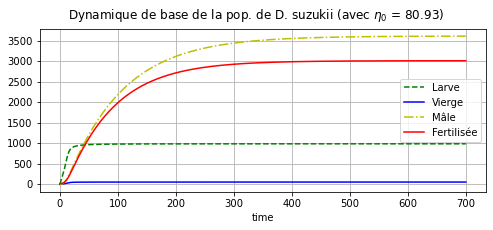

In [11]:
b=3
etha0 = vF*vL*(1-m)*b/(uF*(uF+vF)*(uL+vL))#nombre de descendants de base
#conditions initiales
X0_base = [0,0,0,20]
#dynamique du système
Mb = dynamic_ds(X0_base)

#### 1.4.2-  dynamique du système : Modèle TIS

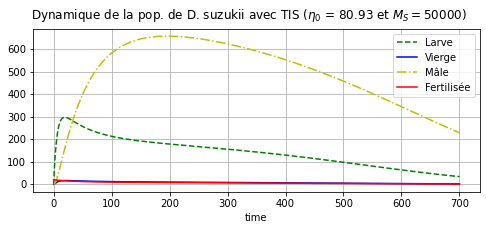

In [12]:
#conditions initiales
X0_tis = [0,0,0,20]
dynamic_ds(X0_tis,Ms=50000,name="dynamique_tis")

### 1.5 - Analyse numérique de l'existence des équilibres du modèle TIS

- Fonction pour déterminer les points d'intersection entre deux courbes

In [13]:
#Les points d'intersection des droites MS et de la parabole
def qintersections(t,curve1, curve2,positive=True,limit=True):
    intersections = []
    prev_dif = 0
    t0, prev_c1, prev_c2 = None, None, None
    for t1, c1, c2 in zip(t, curve1, curve2):
        new_dif = c2 - c1
        if np.abs(new_dif) < 1e-12: # a trouvé un zéro exact, c'est très improbable
            intersections.append((t1, c1))
        elif new_dif * prev_dif < 0:  # la fonction a changé de signe entre ce point et le précédent
            # faire une interpolation linéaire pour trouver le t entre t0 et t1 où les courbes seraient égales
            # Voici l'intersection entre la ligne [(t0, prev_c1), (t1, c1)] et la ligne [(t0, prev_c2), (t1, c2)].
            # à cause du changement de signe, nous savons qu'il y a une intersection entre t0 et t1.
            denom = prev_dif - new_dif
            intersections.append(((-new_dif*t0  + prev_dif*t1) / denom, (c1*prev_c2 - c2*prev_c1) / denom))
        t0, prev_c1, prev_c2, prev_dif = t1, c1, c2, new_dif
    if len(intersections)==0:
        res = r"\textit {Pas d'intersections entre}"
        form = r"\textit { $y=M_S$ et $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$}"
        display(Math(res+form))
        print("-------------------------------------------")
    if len(intersections)==1:
        res = r"\textit {un point d'intersections entre}"
        form = r"\textit { $y=M_S$ et $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit { au point d'équilibre $L_0$ de cordonnée}"+str(intersections)
        display(Math(res+form+pts))
        print("-------------------------------------------")
    if len(intersections)==2:
        res = r"\textit {Deux point d'intersections entre}"
        form = r"\textit { $y=M_S$ et $M_S=\frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$} \\"
        pts = r"\textit { au point d'équilibre $L_1$ et $L_2$ de cordonnée respective} \\"
        cod = str(intersections[0])+"et"+str(intersections[1])
        display(Math(res+form+pts+cod))
        print("-------------------------------------------")
    return intersections

#### 1.5.1 - Visualisation de l'existence des solutions à l'intersection de 𝑦 = $𝑀_𝑆$ et $𝑀_𝑆(L)$

- les points d'intersections suivant les valeurs de $y = M_S$

In [14]:
Ln = np.array(np.arange(L0,L_max,0.1))#discretisation des valeurs de L
Ms = [-etha0*gamma*(l**2)/K + gamma*(etha0-1)*l for l in Ln]#valeurs de MS le long de la parabole
Ms_col = max(Ms)
Ms_sup = Ms_col*1.1#MS avec non existences des équiliblres positifs
Ms_inf = Ms_col*0.9#MS aux équilibres positifs
#Les différents équilibres
#cas1 : point col (y = Max_Ms)
y_col=[Ms_col]*len(Ln)# y=MS sommet de la parabol
display(Math(r"\textit {Au sommet de la parabole i.e $M_S = M_S(L)$}"))
I_col= qintersections(Ln,Ms,y_col)#points d'intersections
#cas2 : non existence des équilibres positifs (Ms > Max_Ms)
y_sup=[Ms_sup]*len(Ln)# y=MS au dessus sommet de la parabol
display(Math(r"\textit {Pour $M_S > M_S(L)$}"))
I_sup= qintersections(Ln,Ms,y_sup)#points d'intersections
#cas1 : existence des équilibres positifs (Ms < Max_Ms)
y_inf=[Ms_inf]*len(Ln) # y=MS en dessous sommet de la parabol
display(Math(r"\textit {Pour $M_S < M_S(L)$}"))
I_inf= qintersections(Ln,Ms,y_inf)#points d'intersections

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-------------------------------------------


- Illustration graphique de l'existence de solutions suivant les valeurs de $y = M_S$

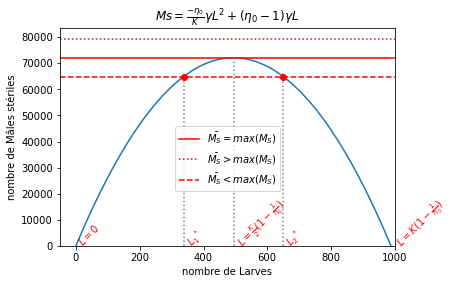

In [15]:
#Nombre de Larves en fonction du nombre de mâles stériles
plt.plot(Ln,Ms)
#tracer les droites horizontales passant par MS
plt.axhline(Ms_col,label=r'$\bar{M_S} = max(M_S)$',color="r",linestyle='solid')# sommet de la parabole
plt.axhline(Ms_sup,label=r'$\bar{M_S} > max(M_S)$',color="r",linestyle=':')# au dessus du sommet de la parabole
plt.axhline(Ms_inf,label=r'$\bar{M_S} < max(M_S)$',color="r",linestyle='--')# en dessous du sommet de la parabole
#les points d'intersections
#le sommet de la parabole
plt.axvline(L_median, color='gray', linestyle='dotted',ymax=0.85)
#premier point d'intersection du cas2: y < MS_max
plt.axvline(np.flip(I_inf[0][0]), color='gray', linestyle='dotted',ymax=0.80)
#second point d'intersection du cas2: y < MS_max
plt.axvline(np.flip(I_inf[1][0]), color='gray', linestyle='dotted',ymax=0.80)
#utiliser np.flip() si les coordonnées ne sont pas sur les mêmes axes
plt.plot(*zip(*(I_inf)), 'ro')
#annotation sur les points et les courbes
plt.annotate(r'$ L = \frac{K}{2}(1-\frac{1}{\eta_0})$', (L_median,1),rotation=45,color='red')
plt.annotate(r'$ L = 0$', (-0.5,1),rotation=45,color='red')
plt.annotate(r'$ L = K(1-\frac{1}{\eta_0})$', (L_max,1),rotation=45,color='red')
plt.annotate(r'$ {L_1}^*$', (I_inf[0][0],1),rotation=45,color='red')
plt.annotate(r'$ {L_2}^*$', (I_inf[1][0],1),rotation=45,color='red')
#titres sur le graphique
plt.legend(bbox_to_anchor=(.5,.4),loc='center')
plt.ylabel('nombre de Mâles stériles')
plt.xlabel('nombre de Larves')
plt.title(r'$Ms = \frac{-\eta_0}{K} \gamma L^2+(\eta_0-1) \gamma L$')
#limite des axes
plt.ylim(bottom=-0.1)
plt.xlim(right=K)
#exportations des graphiques
name=output_fold+r'\parabole'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

### 1.6 - Illustration numérique de la Bistabilité du système dynamique avec TIS

<IPython.core.display.Math object>

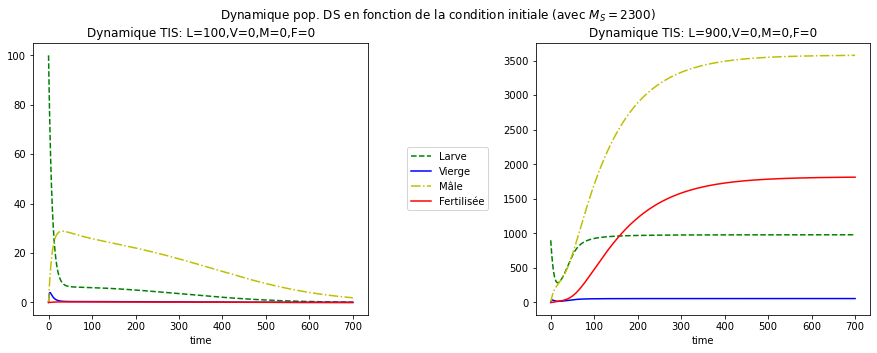

In [32]:
#conditions initiales: deux conditions initiales différentes
cond =[[100,0,0,0],[900,0,0,0]]
#Nombre de mâles stériles
Ms= 2300
# préparer la figure
fig = plt.figure(figsize=(15,5))#figure 
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)
#résoudre le système et tracer la dynamique pour chaque condition initiale
for X0 in cond:
    #fig.suptitle("Dynamique de la pop de D. suzukii en fonction du nombre Ms")
    fig.suptitle("Dynamique pop. DS en fonction de la condition initiale (avec $M_S = $"+str(Ms)+")")
    X = integrate.odeint(model_ds,X0,t,args=(Ms,),hmax=pas_t)    
    L,V,M,F = X.T
    #tracé de la dynamique de population dans le temps
    if X0 == cond[0]:
        ax.plot(t,L,'g--')
        ax.plot(t,V,'b-')
        ax.plot(t,M,'y-.')
        ax.plot(t,F,'r-')
    if X0 == cond[1]:
        ax0.plot(t,L,'g--')
        ax0.plot(t,V,'b-')
        ax0.plot(t,M,'y-.')
        ax0.plot(t,F,'r-')
#label des courbes
ax.plot(0,'g--',label='Larve')
ax.plot(0,'b-',label='Vierge')
ax.plot(0,'y-.',label='Mâle')
ax.plot(0,'r-',label='Fertilisée')
#titre des figures
ax.set_title(r'Dynamique TIS: L='+str(cond[0][0])+",V="+
             str(cond[0][1])+",M="+str(cond[0][2])+",F="+
             str(cond[0][3]))
ax.set_xlabel('time')
ax.grid()
ax0.set_title(r'Dynamique TIS: L='+str(cond[1][0])+",V="+
              str(cond[1][1])+",M="+str(cond[1][2])+",F="+
              str(cond[1][3]))
ax0.set_xlabel('time')
ax.grid()
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
#exportation du graphique
name=output_fold+r'\bistabilite'
plt.savefig(name+'.png', dpi=300)#format PNG
#plt.savefig(name+'.pdf', dpi=300)#format PDF
#Le nombre de larve au sommet de la parabole
text = r"\textit {Pour K = }"+str(K)+r"\textit {, $L_{col}$ = } "+str(L_col)
display(Math(text))

Avec deux conditions intiales différentes et tous les autres parmètres identiques, on tends vers deux équilibres distincts : l'équilibre nulle et l'équilibre positif stable

## II - MODEL DROZOPHILA SUZUKII AVEC DISCRETISATION ET/OU IMMIGRATION

### 2.1 - dynamique du système : Modèle TIS MS-Discret

- 1 -)Le système dynamique est :
\begin{equation}
\left\{
 \begin{array}{rlrl}
 & \dot{M_S} = -\mu_M M_S & \text{($M_S$ : Mâle Stérile)}\\
 & M_S(kT^+) = M_S(kT) + \alpha T & (\text{ avec } k \in \mathbf{N})
 \end{array}
\right.
\end{equation}\\

On en a déduit le nombre de mâle stérile à $kT^+$: 

 $M_S(kT^+) = \frac{\alpha T}{(1-e^{-\mu_M T})} $
 
Avec:

\begin{equation}
\left\{
\begin{array}{rlrl}
\alpha & \text{ la fréquence des lachers en nb mâles/jour} \\
 T & \text{ la période en nb jours} \\
\end{array}
\right.
\end{equation}

- 2 -) Mesure des dégâts des Larves:

On utilise deux indicateurs pour capter les dégâts de larves:

  a-) Le nombre maximal de larve à l'état stationnaire $L^*$
     
  b-) Le cumule du nombre de produit sur une saison de culture $L_{cumul}$ dont la dynamique est:
  
\begin{equation}\dot{J} = L \end{equation}

- système dynamic avec MS discret

In [17]:
#système d'équations avec la dynamique des MS
#definir le systeme d'equations differentiels
def model_lacher_pulse(X,t):
    L = X[0] #larves
    V = X[1] #femelles vierges
    M = X[2] #mâles
    F = X[3] #femelles fertilisées
    Ms = X[4] #males stériles
    J = X[5]#nombre cumulé de laves
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    V_dot = (1-m)*vL*L - (uF+vF)*V
    if Ms==0:
        F_dot = vF*V - uF*F
    if Ms!=0:
        F_dot = vF*V*M/(M+Ms) - uF*F
    Ms_dot = -uM*Ms
    #cumul de lavres
    J_dot = L
    #vecteurs populations
    return np.array([L_dot,V_dot,M_dot,F_dot,Ms_dot,J_dot])

-  dynamique du système avec lachers discret de MS

In [18]:
#resolution du système et tracé graphique
def dynamic_lacher_pulse(X0,T=15,name="dynamic_ms_discret", graph=True):
    #Lacher à chaque itération
    Lacher_MS=alpha*T
    #Résolution du système
    #initialisation des vecteurs population par compartiment
    L_pop,V_pop,M_pop,F_pop,Ms_pop,L_cumul = [],[],[],[],[],[]
    L_kT = [] # vecteur de valeurs de L(kT)
    Time = []#vecteur t
    Tk=t_0# initialisation du temps
    Xk=X0 # initialisation des conditions initiales
    #itération du modèle
    #initialisation condition d'arret
    diff_LkT = 1
    while Tk < t_fin:
    #while diff_LkT > 10**(-3):
        t = np.arange(Tk,Tk+T,pas_t)# discretisation du temps entre kT et kT+
        X = integrate.odeint(model_lacher_pulse,Xk,t)#intégration entre kT et kT+
        L,V,M,F,Ms,J = X.T
        #mise à jour des vecteur population par compartiment
        L_pop=np.append(L_pop,L)
        V_pop=np.append(V_pop,V)
        M_pop=np.append(M_pop,M)
        F_pop=np.append(F_pop,F)
        Ms_pop=np.append(Ms_pop,Ms)
        #Cumul de larve sur une saison 
        if Tk<=saison:
            L_cumul=np.append(L_cumul,J)
        #mise a jour du vecteur temps
        Time = np.append(Time,t)
        #mise à jour de l'instant de départ
        Tk=Tk+T
        #mise à jour de la condition initiale : (Lâches)
        Xk=[L[-1],V[-1],M[-1],F[-1],Ms[-1]+Lacher_MS,J[-1]]#lâchers de mâle stérile
        #mise à jour des vecteur de LkT:
        L_kT += [L[-1]]
        #difference entre L((k+1)T) et L(kT)
        if len(L_kT)>1 :
            diff_LkT = abs(L_kT[-1] - L_kT[-2])
    #nombre de Larves maximal à l'état stationnaire
    L_star = max(L)
    #valeur d'équibre
    #MsEmax = Lacher_MS/(1-math.exp(-uM*T)) 
    #MsEmin = MsEmax-Lacher_MS
    if graph==True:
        #création d'une nouvelle figure
        fig = plt.figure(figsize=(8,3))
        #tracé de la dynamique de population dans le temps
        plt.plot(Time,L_pop,'g--')
        plt.plot(Time,V_pop,'b-')
        plt.plot(Time,M_pop,'y-.')
        plt.plot(Time,F_pop,'r-')
        #plt.plot(T,Msi/10,'black')
        #label des courbes
        plt.plot(0,'g--',label='Larve')
        plt.plot(0,'b-',label='Vierge')
        plt.plot(0,'y-.',label='Mâle')
        plt.plot(0,'r-',label='Fertilisée')
        #titre de le figure
        fig.suptitle(r"Dynamique avec "+str(Lacher_MS)+r" $M_S$ tous les "+ str(T)+" jours")
        plt.xlabel('temps (jour)')
        plt.grid()
        plt.legend(loc='best')
        #plt.legend(bbox_to_anchor=(1.1, 1.05))
        #exportation du graphique
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        #plt.savefig(output_fold+'\\'+name+'.pdf', dpi=300)
    return(Time,Ms_pop,L_star,L_cumul)

- Tracer la dynamique du système sans celle des mâles stériles

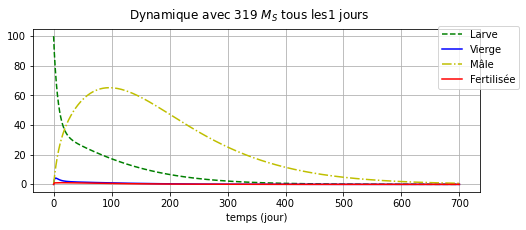

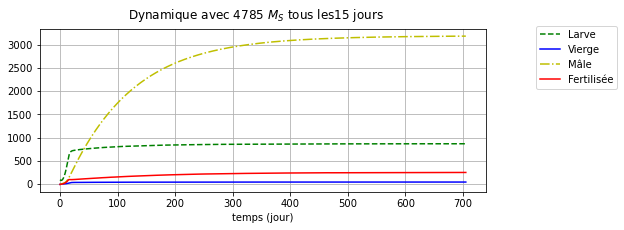

In [19]:
b=3
t_fin = 700
saison = 200
#condition intiale
X0=[100,0,0,0,0,100]
alpha = 319#un ms/jr
Ms_pop1=dynamic_lacher_pulse(X0,T=1,name="ms_pulse_T1")
Ms_pop2=dynamic_lacher_pulse(X0,T=15,name="ms_pulse_T15")

- Tracer la dynamique des mâles stériles

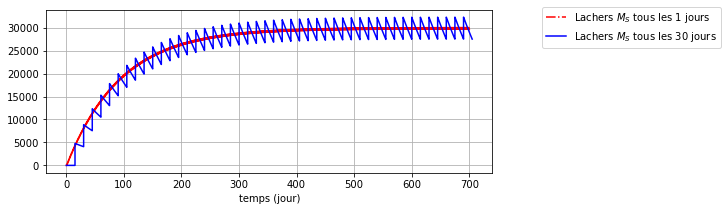

In [20]:
#création d'une nouvelle figure
fig = plt.figure(figsize=(8,3))
plt.plot(Ms_pop1[0],Ms_pop1[1],'r')
plt.plot(Ms_pop2[0],Ms_pop2[1],'b')
plt.plot(0,'r-.',label='Lachers $M_S$ tous les 1 jours')
plt.plot(0,'b-',label='Lachers $M_S$ tous les 30 jours')
plt.xlabel('temps (jour)')
plt.ylabel(r'Mâles Stériles ($M_S$)')
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 1.05))
#exportations des graphiques
name=output_fold+r'\lachers_pulse'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

#### 2.1.a - Nombre maximal de $L^*$ Larves à l'état stationnaire en fonction de $\alpha$ et de la période $T$

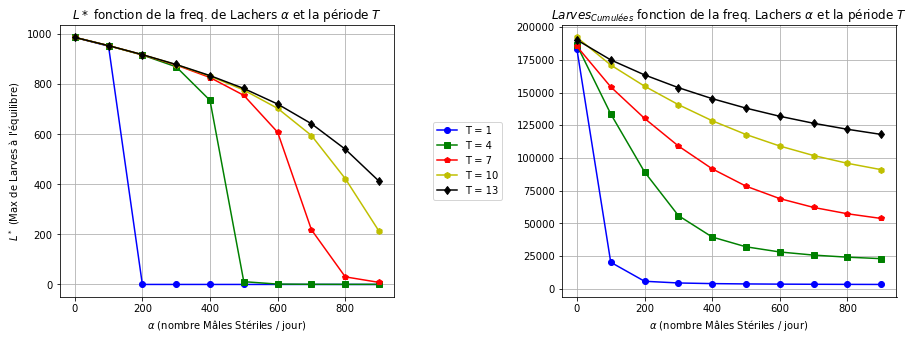

In [21]:
X0=[100,0,0,0,0,100]
b=3
#initialisation du graphique
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,5))#figure 
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)
lines=[]
#couleurs et lignes
markers = ['o','s','p','h','d',"<",">","^"]
colours = ['b','g','r','y','k','m','c','w']
#condition intiale
#T_list_Ms = np.arange(1,14,2)
T_list_Ms =np.arange(1,14,3)
alpha_list = np.arange(0,1000,100)#un ms/jr
i=0
for T in T_list_Ms:
    L_star_list_Ms = []
    L_cumule_list_Ms = []
    for a in alpha_list:
        alpha = a
        puls_ms = dynamic_lacher_pulse(X0,T=T,graph=False)
        #Update nombre de larve max à l'équilibre (L*)
        L_star_T_Ms = puls_ms[2]
        L_star_list_Ms = np.append(L_star_list_Ms,L_star_T_Ms)
        #update cumule de larve L_cumule
        L_cumule = puls_ms[3]
        L_cumule_list_Ms = np.append(L_cumule_list_Ms,L_cumule[-1])
    #tracer L*
    ax.plot(alpha_list,L_star_list_Ms,color=colours[i],
    marker=markers[i],label="T = "+str(T_list_Ms[i]))
    #tracer L_cumule
    ax0.plot(alpha_list,L_cumule_list_Ms,color=colours[i],
    marker=markers[i],label="T = "+str(T_list_Ms[i]))
    i+=1
#titre des figures
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
ax.set_title(r'$L*$ fonction de la freq. de Lachers $\alpha $ et la période $T$')
ax.set_xlabel(r'$\alpha $ (nombre Mâles Stériles / jour)')
ax.set_ylabel("$L^*$ (Max de Larves à l'équilibre)")
ax.grid()
ax0.set_title(r'$Larves_{Cumulées}$ fonction de la freq. Lachers $\alpha $ et la période $T$')
ax0.set_xlabel(r'$\alpha $ (nombre Mâles Stériles / jour)')
ax0.grid()
#exportations des graphiques
name=output_fold+r'\Larve_index_Lacher'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

#### 2.1.b - Cumul du nombre larve de $L_{cumul}$ en fonction de $\alpha$ et de la période $T$

### 2.2 - dynamique du système : Modèle Prélèvement-Discret

- On fait équivaloir le modèle de prélèvement continue au prélèvement Discret Pulsé :

\begin{equation}\dot{L} = -E L
\Longleftrightarrow
\left\{
 \begin{aligned}
 & \dot{L} = 0 & \text{($L$ : Larves)}\\
 & L(kT^+) = (1-p)L(kT) & (\text{ avec } k \in \mathbf{N})
 \end{aligned}
\right.
\end{equation}\\

On en a déduit la proportion moyenne de larves prélevées $p$ du modèle pulsé : 

 $p = 1-e^{-ET}  $
 
Avec:

\begin{equation}
\left\{
\begin{array}{rlrl}
E & \text{ l'effort de prélèvement} \\
 T & \text{ la période en nb jours} \\
\end{array}
\right.
\end{equation}

- 2 -) Mesure des dégâts des Larves:

Comme pour la dynamique avec les lâchers les dégâts de larves sont représentés par :

  a-) Le nombre maximal de larve à l'état stationnaire $L^*$
     
  b-) Le cumule du nombre de produit sur une saison de culture $L_{cumul}$ dont la dynamique est:
  
\begin{equation}\dot{J} = L \end{equation}

- Système dynamique avec Cumul de Larve

In [22]:
def model_ds_J(X,t,Ms=0):
    L = X[0] #larves
    V = X[1] #femelles vierges
    M = X[2] #mâles
    F = X[3] #femelles fertilisées
    J = X[4] #nombre cumulé de laves
    #systèmes d'équations differentielles
    L_dot = b*(1-(L/K))*F - (vL+uL)*L
    M_dot = m*vL*L - uM*M
    V_dot = (1-m)*vL*L - (uF+vF)*V
    if Ms==0:
        F_dot = vF*V - uF*F
    if Ms!=0:
        F_dot = vF*V*M/(M+Ms) - uF*F
    #cumul de lavres
    J_dot = L
    #vecteurs
    return np.array([L_dot,V_dot,M_dot,F_dot,J_dot])

- Dynamique des prélèvement pulsé sans Mâles stériles

In [23]:
#resolution du système et tracé graphique
def dynamic_prelev_pulse(X0,T=15,name="dynamic_pre_discret",graph=True):
    #Résolution du système
    #valeur d'équibre
    p = (1-math.exp(-E*T))
    #Résolution du système
    #Résolution du système
    #initialisation des vecteurs population par compartiment
    L_pop,V_pop,M_pop,F_pop,L_cumul = [],[],[],[],[]
    L_kT = [] # vecteur de valeurs de L(kT)
    Time = []#vecteur t
    Tk=t_0# initialisation du temps
    Xk=X0 # initialisation des conditions initiales
    #itération du modèle
    #initialisation condition d'arret
    diff_LkT = 1
    while Tk < t_fin:
    #while diff_LkT > 10**(-3):
        t = np.arange(Tk,Tk+T,pas_t)# discretisation du temps entre kT et kT+
        X = integrate.odeint(model_ds_J,Xk,t)#intégration entre kT et kT+
        L,V,M,F,J = X.T
        #mise à jour des vecteur population par compartiment
        L_pop=np.append(L_pop,L)
        V_pop=np.append(V_pop,V)
        M_pop=np.append(M_pop,M)
        F_pop=np.append(F_pop,F)
        #Cumul de larve sur une saison 
        if Tk<=saison:
            L_cumul=np.append(L_cumul,J)
        #mise a jour du vecteur temps
        Time = np.append(Time,t)
        #mise à jour de l'instant de départ
        Tk=Tk+T
        #mise à jour de la condition initiale : (Prélèvements)
        Xk=[(1-p)*L[-1],V[-1],M[-1],F[-1],J[-1]]#prelèvement de larves
        #mise à jour des vecteur de LkT:
        L_kT += [L[-1]]
        #difference entre L((k+1)T) et L(kT)
        if len(L_kT)>1 :
            diff_LkT = abs(L_kT[-1]-L_kT[-2])
    #nombre de Larves maximal près de l'état stationnaire
    L_star = max(L)
    if graph==True:
        #création d'une nouvelle figure
        fig = plt.figure(figsize=(8,3))
        #valeur d'équibre#tracé de la dynamique de population dans le temps
        plt.plot(Time,L_pop,'g--')
        plt.plot(Time,V_pop,'b-')
        plt.plot(Time,M_pop,'y-.')
        plt.plot(Time,F_pop,'r-')
        #plt.plot(T,Msi/10,'black')
        #label des courbes
        plt.plot(0,'g--',label='Larve')
        plt.plot(0,'b-',label='Vierge')
        plt.plot(0,'y-.',label='Mâle')
        plt.plot(0,'r-',label='Fertilisée')
        #plt.plot(0,'black',label='Mâle Stérile / 10')
        #titre de le figure
        #plt.ylim(0,500)
        plt.xlabel('temps (jour)')
        plt.grid()
        #plt.legend(loc='best')
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        display(Math(r'\text{pour une ponte intrinsèque } \beta = '+str(b)+r' et {E = }'+str(E)))
        #exportation du graphique
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        #plt.savefig(output_fold+'\\'+name+'.pdf', dpi=300)
    return(L_star,L_cumul)

<IPython.core.display.Math object>

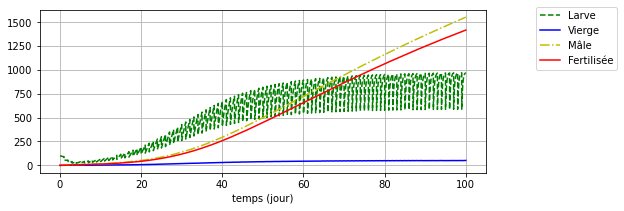

In [24]:
E=0.5 #effort de prélèvement
b=3
Ms=0
t_fin=100
saison=200
#condition intiale
X0=[100,0,0,0,100]
sys_pop=dynamic_prelev_pulse(X0,T=3,name="prelev_pulse_B3")
#pour b=0.5 jamais en dessous de 0.34 et 6 j

<IPython.core.display.Math object>

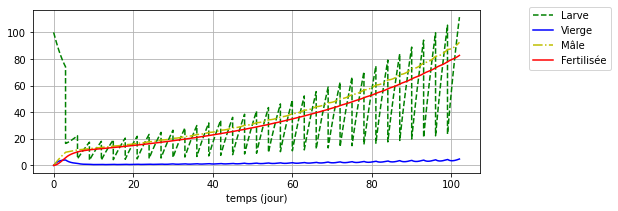

In [25]:
####
b = 0.5
t_fin=100
sys_kT_plus=dynamic_prelev_pulse(X0,T=3,name="prelev_pulse_B05")

### 2.2.3 - Dégats des larves en fonction de la période dans le modèle de prélèvements pulsés

#### 2.2.3.a - Evolution du nombre de Larves à l'état stationnaire en fonction de la période

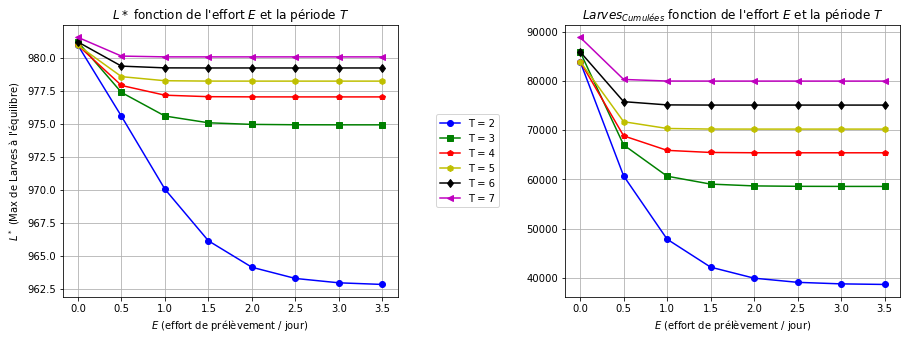

In [26]:
X0=[100,0,0,0,100]
b=3
#initialisation du graphique
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,5))#figure 
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)
lines=[]
#couleurs et lignes
markers = ['o','s','p','h','d',"<",">","^"]
colours = ['b','g','r','y','k','m','c','w']
#condition intiale
T_list_Ms =np.arange(2,8,1)
E_list = np.arange(0,4,0.5)#en proportion de larves/jr
i=0
for T in T_list_Ms:
    L_star_list_Ms = []
    L_cumule_list_Ms = []
    for Ep in E_list:
        E = Ep
        puls_prelev = dynamic_prelev_pulse(X0,T=T,graph=False)
        #Update nombre de larve max à l'équilibre (L*)
        L_star_T_Ms = puls_prelev[0]
        L_star_list_Ms = np.append(L_star_list_Ms,L_star_T_Ms)
        #update cumule de larve L_cumule
        L_cumule = puls_prelev[1]
        L_cumule_list_Ms = np.append(L_cumule_list_Ms,L_cumule[-1])
    #tracer L*
    lines += ax.plot(E_list,L_star_list_Ms,color=colours[i],
            marker=markers[i],label="T = "+str(T_list_Ms[i]))
    #tracer L_cumule
    lines += ax0.plot(E_list,L_cumule_list_Ms,color=colours[i],
            marker=markers[i],label="T = "+str(T_list_Ms[i]))
    i+=1
#titre de le figure
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))
ax.set_title(r"$L*$ fonction de l'effort $E$ et la période $T$")
ax.set_xlabel(r'$E $ (effort de prélèvement / jour)')
ax.set_ylabel("$L^*$ (Max de Larves à l'équilibre)")
ax.grid()
ax0.set_title(r"$Larves_{Cumulées}$ fonction de l'effort $E$ et la période $T$")
ax0.set_xlabel(r'$E $ (effort de prélèvement / jour)')
ax0.grid()
#exportations des graphiques
name=output_fold+r'\Larve_index_Effort'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

### 2.4 - dynamique du système avec prélèvement et lachers discret

In [27]:
#resolution du système et tracé graphique
def prelev_lacher_pulse(X0,Tp=3,Tm=15,name="dynamic_pre_ms", graph=True):
    Tm=2*Tp
    #Période maximale
    T = min([Tp,Tm])
    #valeur d'équibre prélèvement
    p = (1-math.exp(-E*Tp))
    #Lacher à chaque itération
    Lacher_MS=alpha*T
    #Résolution du système
    #initialisation des vecteurs population par compartiment
    L_pop,V_pop,M_pop,F_pop,Ms_pop,L_cumul = [],[],[],[],[],[]
    L_kT = [] # vecteur de valeurs de L(kT)
    Time = []#vecteur t
    Tk=t_0# initialisation du temps
    Xk=X0 # initialisation des conditions initiales
    #itération du modèle
    #initialisation condition d'arret
    diff_LkT = 1
    while Tk < t_fin:
    #while diff_LkT > 10**(-3):
        t = np.arange(Tk,Tk+T,pas_t)# discretisation du temps entre kT et kT+
        X = integrate.odeint(model_lacher_pulse,Xk,t)#intégration entre kT et kT+
        L,V,M,F,Ms,J = X.T
        #mise à jour des vecteur population par compartiment
        L_pop=np.append(L_pop,L)
        V_pop=np.append(V_pop,V)
        M_pop=np.append(M_pop,M)
        F_pop=np.append(F_pop,F)
        Ms_pop=np.append(Ms_pop,Ms)
        #Cumul de larve sur une saison 
        if Tk<=saison:
            L_cumul=np.append(L_cumul,J)
        #mise à jour des vecteur de LkT:
        L_kT += [L[-1]]
        #mise a jour du vecteur temps
        Time = np.append(Time,t)
        #mise à jour de l'instant de départ
        Tk=Tk+T
        #mise à jour de la condition initiale : (Prélèvements et Lâchers)
        last_L_pop = L[-1]
        last_Ms_pop = Ms[-1]
        if Tk%Tp == 0:
            last_L_pop =(1-p)*last_L_pop#prélèvements
        if Tk%Tm == 0:
            last_Ms_pop = last_Ms_pop+Lacher_MS#lâcher de mâle stérile
        Xk=[last_L_pop,V[-1],M[-1],F[-1],last_Ms_pop,J[-1]]
        #difference entre L((k+1)T) et L(kT)
        #if len(L_kT)>1 :
            #diff_LkT = abs(L_kT[-1] - L_kT[-2])
    #nombre de Larves maximal à l'état stationnaire
    L_star = max(L)
    if graph==True:
        #création d'une nouvelle figure
        fig = plt.figure(figsize=(8,3))
        #tracé de la dynamique de population dans le temps
        plt.plot(Time,L_pop,'g--')
        plt.plot(Time,V_pop,'b-')
        plt.plot(Time,M_pop,'y-.')
        plt.plot(Time,F_pop,'r-')
        #plt.plot(T,Msi/10,'black')
        #label des courbes
        plt.plot(0,'g--',label='Larve')
        plt.plot(0,'b-',label='Vierge')
        plt.plot(0,'y-.',label='Mâle')
        plt.plot(0,'r-',label='Fertilisée')
        #titre de le figure
        fig.suptitle(r"Dynamique avec "+str(Lacher_MS)+r" $M_S$ tous les "+ str(T)+" jours")
        plt.xlabel('temps (jour)')
        plt.grid()
        #plt.legend(loc='best')
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        #exportation du graphique
        plt.savefig(output_fold+'\\'+name+'.png', dpi=300)
        #plt.savefig(output_fold+'\\'+name+'.pdf', dpi=300)
    return(Time,Ms_pop,L_star,L_cumul)

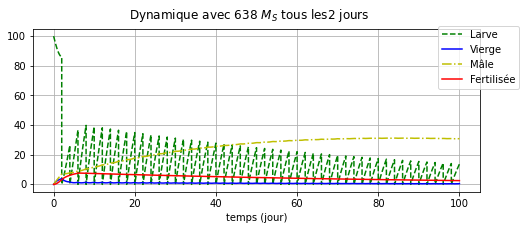

In [28]:
E=5 #effort de prélèvement
b=3
alpha = 319#un ms/jr
t_fin = 100
#condition intiale
X0=[100,0,0,0,0,100]
dsys_kT_plus=prelev_lacher_pulse(X0,Tp=2,name="model_mixte")

- Dynamics Mâles Stériles dans le modèle Mixte

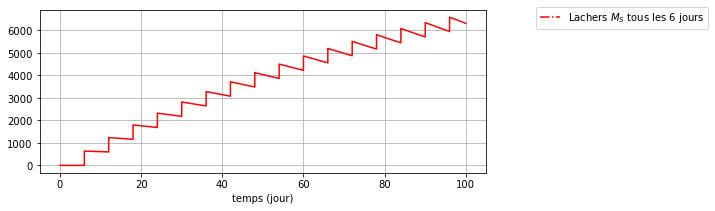

In [29]:
#création d'une nouvelle figure
fig = plt.figure(figsize=(8,3))
plt.plot(dsys_kT_plus[0],dsys_kT_plus[1],'r')
plt.plot(0,'r-.',label='Lachers $M_S$ tous les 6 jours')
plt.xlabel('temps (jour)')
plt.ylabel('Mâles Stériles ($M_S$)')
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 1.05))
#exportations des graphiques
name=output_fold+r'\ms_pulse_avec_prelev'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
#plt.xlim(0,24)
plt.show()

- Larves à l'état stationnaire Modèle Mixte en fonction de {\alpha} et {E}

<IPython.core.display.Math object>

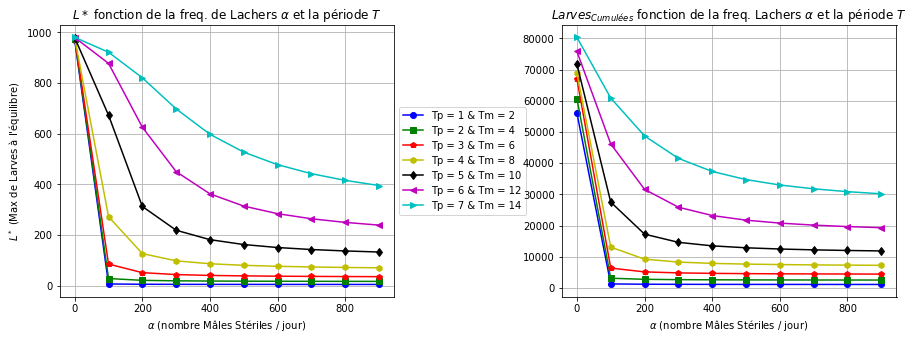

In [30]:
b=3
E = 0.5#effort de prelèvement par jr
display(Math(r' {E=} '+str(E)+r'\text{ effort de prelèvement }'))
#condition intiale
X0=[100,0,0,0,0,100]
#initialisation du graphique
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,5))#figure 
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)
lines=[]
#couleurs et lignes
markers = ['o','s','p','h','d',"<",">","^"]
colours = ['b','g','r','y','k','m','c','w']
#
Tp_list =np.arange(1,8,1)
alpha_list = np.arange(0,1000,100)#un ms/jr
i=0
for Tp in Tp_list:
    L_star_list = []
    L_cumule_list = []
    for a in alpha_list:
        alpha = a
        puls = prelev_lacher_pulse(X0,Tp=Tp,Tm=2*Tp,graph=False)
        #Update nombre de larve max à l'équilibre (L*)
        L_star_T = puls[2]
        L_star_list = np.append(L_star_list,L_star_T)
        #update cumule de larve L_cumule
        L_cumule = puls[3]
        L_cumule_list = np.append(L_cumule_list,L_cumule[-1])
    #tracer L*
    ax.plot(alpha_list,L_star_list,color=colours[i],
    marker=markers[i],label="Tp = "+str(Tp_list[i])+" & Tm = "+str(Tp_list[i]*2))
    #tracer L_cumule
    ax0.plot(alpha_list,L_cumule_list,color=colours[i],
    marker=markers[i],label="Tp = "+str(Tp_list[i])+" & Tm = "+str(Tp_list[i]*2))
    i+=1
#titre des figures
ax.legend(loc='center left',bbox_to_anchor=(1., 0.5))
ax.set_title(r'$L*$ fonction de la freq. de Lachers $\alpha $ et la période $T$')
ax.set_xlabel(r'$\alpha $ (nombre Mâles Stériles / jour)')
ax.set_ylabel("$L^*$ (Max de Larves à l'équilibre)")
ax.grid()
ax0.set_title(r'$Larves_{Cumulées}$ fonction de la freq. Lachers $\alpha $ et la période $T$')
ax0.set_xlabel(r'$\alpha $ (nombre Mâles Stériles / jour)')
ax0.grid()
#exportations des graphiques
name=output_fold+r'\index_Effort_fixe'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

<IPython.core.display.Math object>

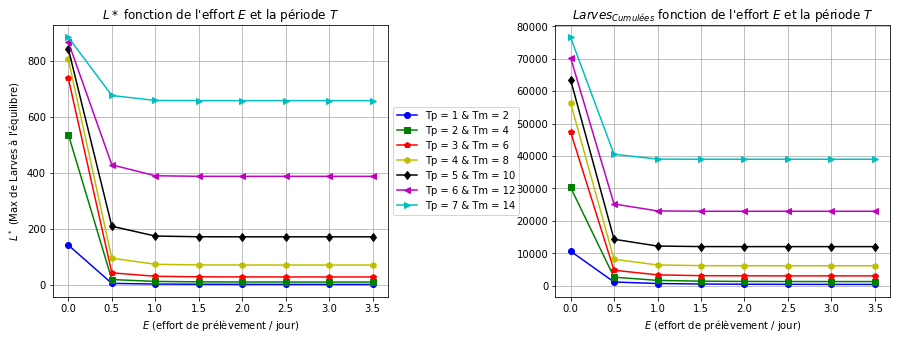

In [31]:
b=3
alpha = 319#un ms/jr
display(Math(r' \alpha = '+str(alpha)+r'\text{ Lâcher de Mâles stériles par jour }'))
#condition intiale
X0=[100,0,0,0,0,100]
#initialisation du graphique
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,5))#figure 
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)
lines=[]
#couleurs et lignes
markers = ['o','s','p','h','d',"<",">","^"]
colours = ['b','g','r','y','k','m','c','w']
#
Tp_list =np.arange(1,8,1)
Tm_list =np.arange(1,14,3)
E_list = np.arange(0,4,0.5)#en proportion de larves/jr
i=0
for Tp in Tp_list:
    L_star_list = []
    L_cumule_list = []
    for Ep in E_list:
        E = Ep
        puls = prelev_lacher_pulse(X0,Tp=Tp,Tm=2*Tp,graph=False)
        #Update nombre de larve max à l'équilibre (L*)
        L_star_T = puls[2]
        L_star_list = np.append(L_star_list,L_star_T)
        #update cumule de larve L_cumule
        L_cumule = puls[3]
        L_cumule_list = np.append(L_cumule_list,L_cumule[-1])
    #tracer L*
    lines += ax.plot(E_list,L_star_list,color=colours[i],
            marker=markers[i],label="Tp = "+str(Tp_list[i])+" & Tm = "+str(Tp_list[i]*2))
    #tracer L_cumule
    lines += ax0.plot(E_list,L_cumule_list,color=colours[i],
            marker=markers[i],label="Tp = "+str(Tp_list[i])+" & Tm = "+str(Tp_list[i]*2))
    i+=1
#titre de le figure
ax.legend(loc='center left',bbox_to_anchor=(1., 0.5))
ax.set_title(r"$L*$ fonction de l'effort $E$ et la période $T$")
ax.set_xlabel(r'$E $ (effort de prélèvement / jour)')
ax.set_ylabel("$L^*$ (Max de Larves à l'équilibre)")
ax.grid()
ax0.set_title(r"$Larves_{Cumulées}$ fonction de l'effort $E$ et la période $T$")
ax0.set_xlabel(r'$E $ (effort de prélèvement / jour)')
ax0.grid()
#exportations des graphiques
name=output_fold+r'\index_Lachers_fixe'
plt.savefig(name+'.png', dpi=300)
#plt.savefig(name+'.pdf', dpi=300)
plt.show()

### 2.6 - dynamique du système : Modèle avec Immigration 

## III - MODEL DROSOPHILA SUZUKII AVEC PRELEVEMENTS CONTINU

### 3.1 - Le système dynamique avec prélèvement continu

#### 3.1.1 - dynamique du système : Modèle de base avec prélèvement continu

#### 3.1.2 - dynamique du système : Modèle TIS avec prélèvement continu

- nombre de descendant de base moyen et nombre moyen de mâles stérile